# - Credict risk scoring - Proyect

In [1]:
__author__ = "Jorge Aliaga Luque"
__website__ = "https://jorgealiaga36.github.io/jorge-aliaga-luque/"

## Decision trees and ensemble learning

The main goal of this proyect is to apply machine learning to predict whether a customer will fail to pay back a loan (default prediction).

Imagine that we work at a bank. When we receive a loan application, we need to make sure that if we give the money, the customer will be able to pay it back. Every application carries a risk of default — the failure to return the money. We’d like to minimize this risk: before agreeing to give a loan, we want to score the customer and assess the chances of default. If it’s too high, we reject the application. This process is called “credit risk scoring.

First we will apply the simplest tree based model "Decision trees". Then we will combine them into a an ensemble to achieve better performance. We cover two tree-based ensemble models: random forest and gradient boosting.


## Table of Contents

- [**1. Reading and preparing data**](#ap1)

- [**2. Decision Trees**](#ap2)

    - 2.1. [Hypterparameters tunning](#ap2_1)
        - 2.1.1. [max_depth](#ap2_1_1)
        - 2.1.2. [min_samples_leaf](#ap2_1_2)
   
    - 2.2. [Model selection](#ap2_2)
        - 2.2.1. [Feature importance](#ap2_2_1)
 
- [**3. Random Forest**](#ap3)

    - 3.1. [Hypterparameters tunning](#ap3_1)
        - 3.1.1. [n_estimators](#ap3_1_1)
        - 3.1.2. [max_depth](#ap3_1_2)
        - 3.1.3. [min_samples_leaf](#ap3_1_3)
    
    - 3.2. [Model selection](#ap3_2)
        - 3.2.1. [Feature importance](#ap3_2_1)
    
- [**4. XGBoost**](#ap4)

    - 4.1. [Hypterparameters tunning](#ap4_1)
        - 2.1.1. [eta](#ap4_1_1)
        - 2.1.2. [max_depth](#ap4_1_2)
        - 2.1.2. [min_child_witdh](#ap4_1_3)
        - 2.1.2. [num_boost_round](#ap4_1_4)
    - 4.2. [Model selection](#ap4_2)
        - 4.2.1. [Feature importance](#ap4_2_1)

- [**5. Comparison between models**](#ap5)
- [**6. Final test**](#ap6)

-----------------------------------------------------------------------------------------------------

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score, roc_curve

import xgboost as xgb

from IPython.display import display

/home/jorgealiaga36/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<a name="ap1"></a>
# 1. Reading and preparing data

In [3]:
df = pd.read_csv("CreditScoring.csv")

print("Number of examples: {}".format(len(df)))
df.T

Number of examples: 4455


,0,1,2,3,4,5,6,7,8,9,...,4445,4446,4447,4448,4449,4450,4451,4452,4453,4454
Status,1,1,2,1,1,1,1,1,1,2,...,2,1,1,1,2,2,1,2,1,1
Seniority,9,17,10,0,0,1,29,9,0,0,...,6,23,6,3,1,1,22,0,0,5
Home,1,1,2,1,1,2,2,5,2,5,...,5,2,2,2,6,1,2,2,1,2
Time,60,60,36,60,36,60,60,12,60,48,...,60,60,48,60,48,60,60,24,48,60
Age,30,58,46,24,26,36,44,27,32,41,...,22,50,52,49,30,39,46,37,23,32
Marital,2,3,2,1,1,2,2,1,2,2,...,1,2,2,2,2,2,2,2,1,2
Records,1,1,2,1,1,1,1,1,1,1,...,2,2,1,1,2,1,1,1,1,1
Job,3,1,3,1,1,1,1,1,3,2,...,1,3,1,1,2,1,1,2,3,3
Expenses,73,48,90,63,46,75,75,35,90,90,...,35,90,45,35,75,69,60,60,49,60
Income,129,131,200,182,107,214,125,80,107,80,...,100,69,190,160,77,92,75,90,140,140


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4455 non-null   int64
 1   Seniority  4455 non-null   int64
 2   Home       4455 non-null   int64
 3   Time       4455 non-null   int64
 4   Age        4455 non-null   int64
 5   Marital    4455 non-null   int64
 6   Records    4455 non-null   int64
 7   Job        4455 non-null   int64
 8   Expenses   4455 non-null   int64
 9   Income     4455 non-null   int64
 10  Assets     4455 non-null   int64
 11  Debt       4455 non-null   int64
 12  Amount     4455 non-null   int64
 13  Price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


First, we can see that the columns are in upper/lower case:

In [5]:
df.columns = df.columns.str.lower()
df.T

,0,1,2,3,4,5,6,7,8,9,...,4445,4446,4447,4448,4449,4450,4451,4452,4453,4454
status,1,1,2,1,1,1,1,1,1,2,...,2,1,1,1,2,2,1,2,1,1
seniority,9,17,10,0,0,1,29,9,0,0,...,6,23,6,3,1,1,22,0,0,5
home,1,1,2,1,1,2,2,5,2,5,...,5,2,2,2,6,1,2,2,1,2
time,60,60,36,60,36,60,60,12,60,48,...,60,60,48,60,48,60,60,24,48,60
age,30,58,46,24,26,36,44,27,32,41,...,22,50,52,49,30,39,46,37,23,32
marital,2,3,2,1,1,2,2,1,2,2,...,1,2,2,2,2,2,2,2,1,2
records,1,1,2,1,1,1,1,1,1,1,...,2,2,1,1,2,1,1,1,1,1
job,3,1,3,1,1,1,1,1,3,2,...,1,3,1,1,2,1,1,2,3,3
expenses,73,48,90,63,46,75,75,35,90,90,...,35,90,45,35,75,69,60,60,49,60
income,129,131,200,182,107,214,125,80,107,80,...,100,69,190,160,77,92,75,90,140,140


Although most of the columns are numerical, some are categorical: status, home, marital [status], records, and job. The values we see in the DataFrame, however, are numbers, not strings. This means that we need to translate them to their actual names.

In [6]:
status_values = {
    1: "ok",
    2: "default",
    0: "unk"
}

home_values = {
    1: "rent",
    2: "owner",
    3: "private",
    4: "ignore",
    5: "parents",
    6: "other",
    0: "unk"
}

marital_values = {
    1: "single",
    2: "married",
    3: "widow",
    4: "separated",
    5: "divorced",
    0: "unk"
}

records_values = {
    1: "no",
    2: "yes",
    0: "unk"
}

job_values = {
    1: "fixed",
    2: "partime",
    3: "freelance",
    4: "others",
    0: "unk2"
}


df.status = df.status.map(status_values)
df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)

In [7]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


One thing we notice immediately is that the max value is 99999999 in some cases. As it turns out, it’s an artificial value. This is how missing values
are encoded in this dataset.

In [8]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [9]:
for column in ["income", "assets", "debt"]:
    df[column] = df[column].replace(to_replace = 99999999.0, value = np.nan)

In [10]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


Lent's look to the distribution of the target variable "status". As we can see there is unexpected value called "unk" so we have to remove it.

In [11]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [12]:
df = df[df.status != "unk"]

Now, let´s check for missing values. As we can see it corresponds with the columns we replaced "99999999.0" value.

In [13]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [14]:
df.assets = df.assets.fillna(0)
df.income = df.income.fillna(0)
df.debt = df.debt.fillna(0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4454 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   status     4454 non-null   object 
 1   seniority  4454 non-null   int64  
 2   home       4454 non-null   object 
 3   time       4454 non-null   int64  
 4   age        4454 non-null   int64  
 5   marital    4454 non-null   object 
 6   records    4454 non-null   object 
 7   job        4454 non-null   object 
 8   expenses   4454 non-null   int64  
 9   income     4454 non-null   float64
 10  assets     4454 non-null   float64
 11  debt       4454 non-null   float64
 12  amount     4454 non-null   int64  
 13  price      4454 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 522.0+ KB


Then, we split the dataset into three parts:
+ Training data: 60%
+ Validation data: 20%
+ Test data: 20%

One hot-encoding technique is applied for encoding the data:

In [ ]:
X = df.drop(columns = ["status"], axis = 1)
y = df["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [79]:
df_train_full, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_train_full, test_size = 0.25, random_state = 2)

Y_train = (df_train.status == "default").values
Y_val = (df_val.status == "default").values
Y_test = (df_test.status == "default").values

del df_train["status"]
del df_val ["status"]
del df_test["status"]

In [80]:
train_dict = df_train.to_dict(orient = "records")
val_dict = df_val.to_dict(orient = "records")
test_dict = df_test.to_dict(orient = "records")

dv = DictVectorizer(sparse = False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

<a name="ap2"></a>
# 2. Decision trees

In [18]:
dt = DecisionTreeClassifier()  #Default value: None that means the tree can grow as large as possible.
dt.fit(X_train, Y_train)

Y_pred_train = dt.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(Y_train, Y_pred_train)
print("Train AUC: {}".format(auc_train))

Y_pred_val = dt.predict_proba(X_val)[:, 1]
auc_val = roc_auc_score(Y_val, Y_pred_val)
print("Validation AUC: {}".format(auc_val))

Train AUC: 0.9999996522888089
Validation AUC: 0.6398288443509769


As we can see, out model is overfitting. The tree learned the training data so well that it simply memorized the outcome for each customer. However, when we applied it to the validation set, the model failed. The rules it extracted from the data turned out to be too specific to the training set, so it worked poorly for customers it didn’t see during training. In such cases, we say that the model cannot generalize.

Let's control the complexity of the model, for instance, retricting the tree size.

The performance is better the previous tree.

In [19]:
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, Y_train)

Y_pred_train = dt.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(Y_train, Y_pred_train)
print("Train AUC: {}".format(auc_train))

Y_pred_val = dt.predict_proba(X_val)[:, 1]
auc_val = roc_auc_score(Y_val, Y_pred_val)
print("Validation AUC: {}".format(auc_val))

Train AUC: 0.729390636137624
Validation AUC: 0.7031824055540072


Also we can see the tree implemented:

In [20]:
tree_text = export_text(dt, feature_names = dv.feature_names_)
print(tree_text)

|--- seniority <= 2.50
|   |--- income <= 100.50
|   |   |--- class: True
|   |--- income >  100.50
|   |   |--- class: False
|--- seniority >  2.50
|   |--- records=yes <= 0.50
|   |   |--- class: False
|   |--- records=yes >  0.50
|   |   |--- class: False



<a name="ap2_1"></a>
## 2.1. Tuning hyparameters

Our model is too simple so we need to tune the hyperparameters (max depth and others): try different parameters and see which ones lead to the best AUC.

Hyperparameters:
+ max_depth
+ min_samples_leaf

<a name="ap2_1_1"></a>
### 2.1.1. max_depth

In [21]:
tree_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, None]
scores = []

for d in tree_depth:
    dt = DecisionTreeClassifier(max_depth = d)
    dt.fit(X_train, Y_train)
    Y_pred_val = dt.predict_proba(X_val)[:, 1]
    AUC = roc_auc_score(Y_val, Y_pred_val).round(3)
    scores.append(AUC)
    
final_results = dict(zip(tree_depth, scores))

In [22]:
best_value = max(final_results.values())
best_key = max(final_results, key = final_results.get)

print("\nFinal option -> {}: {}".format(best_key, best_value))


Final option -> 5: 0.789


+ The ROC value is optimal for `max_depth = 5`.

<a name="ap2_1_2"></a>
### 2.1.2. min_samples_leaf

In [23]:
tree_depth = [4, 5, 6]
tree_leafsize = [1, 5, 10, 15, 20, 50, 100, 200]
scores = []
final_results = {}

for d in tree_depth:
    scores = []
    
    for lf in tree_leafsize:
        
        dt = DecisionTreeClassifier(max_depth = d, min_samples_leaf = lf)
        dt.fit(X_train, Y_train)
        Y_pred_val = dt.predict_proba(X_val)[:, 1]
        AUC = roc_auc_score(Y_val, Y_pred_val).round(6)
        scores.append(AUC)
        
    final_results[d] = scores

print("Results: {}".format(final_results))

Results: {4: [0.773323, 0.773323, 0.77637, 0.770866, 0.770866, 0.774524, 0.757801, 0.736226], 5: [0.788697, 0.792631, 0.787183, 0.792124, 0.78997, 0.791775, 0.764823, 0.739428], 6: [0.782391, 0.790268, 0.784054, 0.792824, 0.792529, 0.79804, 0.767445, 0.742674]}


In [24]:
best_dict = {key: max(val) for key, val in final_results.items()}
print("Best: {}".format(best_dict))

best_value = max(best_dict.values())
best_key = max(best_dict, key = best_dict.get)

print("\nFinal option -> {}: {}".format(best_key, best_value))

Best: {4: 0.77637, 5: 0.792631, 6: 0.79804}

Final option -> 6: 0.79804


The ROC value is optimal for `min_leaf_size = 50`.

<a name="ap2_2"></a>
## 2.2. Model selected

In [25]:
dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 50)
dt.fit(X_train, Y_train)
Y_pred_val_dt = dt.predict_proba(X_val)[:, 1]

ROC_dt = roc_auc_score(Y_val, Y_pred_val)

print("ROC Decision Trees: {}".format(ROC_dt))

ROC Decision Trees: 0.7426742595079434


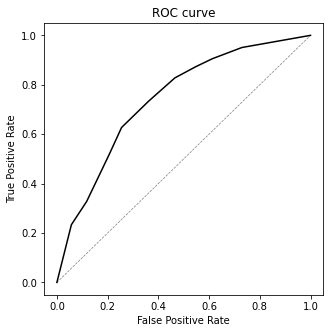

In [26]:
FPR, TPR, _ = roc_curve(Y_val, Y_pred_val)

plt.figure(figsize = (5, 5))

plt.plot(FPR, TPR, color = "black")
plt.plot([0, 1], [0, 1], color = "black", linewidth  = 0.7, linestyle = "dashed", alpha = 0.5)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")

plt.show()

<a name="ap2_2_1"></a>
### 2.2.1 Feature importance

In [97]:
feat_importances = list(zip(dv.feature_names_, dt.feature_importances_))
feat_importances

[('age', 0.0),
 ('amount', 0.0769559317712154),
 ('assets', 0.07380311220048563),
 ('debt', 0.0),
 ('expenses', 0.0),
 ('home=ignore', 0.0),
 ('home=other', 0.0),
 ('home=owner', 0.0),
 ('home=parents', 0.0),
 ('home=private', 0.0),
 ('home=rent', 0.0),
 ('home=unk', 0.0),
 ('income', 0.2462967279310876),
 ('job=fixed', 0.0),
 ('job=freelance', 0.0),
 ('job=others', 0.0),
 ('job=partime', 0.0482727502200492),
 ('job=unk2', 0.0),
 ('marital=divorced', 0.0),
 ('marital=married', 0.0),
 ('marital=separated', 0.0),
 ('marital=single', 0.0),
 ('marital=unk', 0.0),
 ('marital=widow', 0.0),
 ('price', 0.0),
 ('records=no', 0.0),
 ('records=yes', 0.22515967645870097),
 ('seniority', 0.30684169935173355),
 ('time', 0.022670102066727645)]

In [96]:
df_importances = pd.DataFrame(feat_importances, columns = ["feature", "gain"]).sort_values(by = "gain", ascending  = False)
df_importances

,feature,gain
27,seniority,0.306842
12,income,0.246297
26,records=yes,0.225160
1,amount,0.076956
2,assets,0.073803
16,job=partime,0.048273
28,time,0.022670
25,records=no,0.000000
24,price,0.000000
23,marital=widow,0.000000


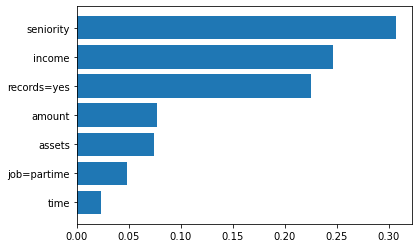

In [94]:
df_importances = df_importances[df_importances.gain > 0]

num = len(df_importances)

plt.plot(figsize = (6,4))
plt.barh(range(num), df_importances.gain[::-1])
plt.yticks(range(num), df_importances.feature[::-1])

plt.show()

<a name="ap3"></a>
# 3. Random forest

In [27]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 2)
rf.fit(X_train, Y_train)
Y_pred_val = rf.predict_proba(X_val)[:, 1]
print("ROC: {}".format(roc_auc_score(Y_val, Y_pred_val).round(3)))

ROC: 0.796


Let's check the ROC value when the number of trees (n_stimators) is changed:

<a name="ap3_1"></a>
## 3.1.Tuning hyperparameters

Now, we are going to tune the following hyperparameters:
+ n_estimators.
+ max_depth.
+ min_samples_leaf.

<a name="ap3_1_1"></a>
### 3.1.1. n_estimators

In [28]:
n_trees = np.arange(10, 201, 10)
scores = []

for n in n_trees:
    rf = RandomForestClassifier(n_estimators = n, random_state = 5)
    rf.fit(X_train, Y_train)
    Y_pred_val = rf.predict_proba(X_val)[:, 1]
    ROC = roc_auc_score(Y_val, Y_pred_val).round(5)
    scores.append(ROC)
    
final_results = dict(zip(n_trees, scores))
print("Results:  {}".format(final_results))

Results:  {10: 0.78105, 20: 0.8008, 30: 0.80836, 40: 0.81062, 50: 0.81855, 60: 0.82267, 70: 0.82396, 80: 0.82432, 90: 0.82393, 100: 0.82563, 110: 0.82506, 120: 0.82649, 130: 0.82585, 140: 0.82653, 150: 0.82689, 160: 0.82712, 170: 0.82776, 180: 0.8277, 190: 0.82845, 200: 0.82887}


In [29]:
best_value = max(final_results.values())
best_key = max(final_results, key = final_results.get)

print("\nFinal option -> {}: {}".format(best_key, best_value))


Final option -> 200: 0.82887


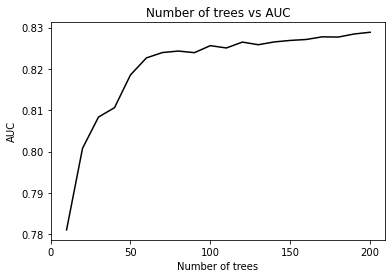

In [30]:
plt.figure(figsize = (6, 4))

plt.plot(n_trees, scores, color = "black")
plt.xticks(np.arange(0, 201, 50))

plt.title("Number of trees vs AUC")
plt.xlabel("Number of trees")
plt.ylabel("AUC")

plt.show()

The performance grows rapidly for the first 25–30 trees; then the growth slows down. After 130, adding more trees is not helpful anymore: the performance stays approximately at the level of 82%.

+ The best `n_estimators = 200`.

<a name="ap3_1_2"></a>
### 3.1.2. max_depth 

In [31]:
tree_depth = [5, 10, 20]
n_trees = np.arange(10, 201, 10)
scores = []
final_results = {}

for d in tree_depth:
    scores = []
    
    for n in n_trees:
        rf = RandomForestClassifier(n_estimators = n, max_depth = d, random_state = 2)
        rf.fit(X_train, Y_train)
        Y_pred_val = rf.predict_proba(X_val)[:, 1]
        ROC = roc_auc_score(Y_val, Y_pred_val).round(5)
        scores.append(ROC)
    
    final_results[d] = scores

print("Results: {}".format(final_results))

Results: {5: [0.81568, 0.82548, 0.83008, 0.82948, 0.83108, 0.82966, 0.8286, 0.82809, 0.83031, 0.83071, 0.83048, 0.83056, 0.83187, 0.83195, 0.83175, 0.83181, 0.83223, 0.83168, 0.83143, 0.8313], 10: [0.79835, 0.8214, 0.82863, 0.8268, 0.82919, 0.82975, 0.83004, 0.83194, 0.83295, 0.83395, 0.83477, 0.83507, 0.8376, 0.83769, 0.83784, 0.83881, 0.83957, 0.83884, 0.83971, 0.84002], 20: [0.79474, 0.80971, 0.81755, 0.82122, 0.82466, 0.82757, 0.83067, 0.82974, 0.83062, 0.8297, 0.82971, 0.83256, 0.83333, 0.83348, 0.83347, 0.83268, 0.83231, 0.83153, 0.83145, 0.83124]}


In [32]:
best_dict = {key: max(val) for key, val in final_results.items()}
print("Best: {}".format(best_dict))

best_value = max(best_dict.values())
best_key = max(best_dict, key = best_dict.get)

print("\nFinal option -> {}: {}".format(best_key, best_value))

Best: {5: 0.83223, 10: 0.84002, 20: 0.83348}

Final option -> 10: 0.84002


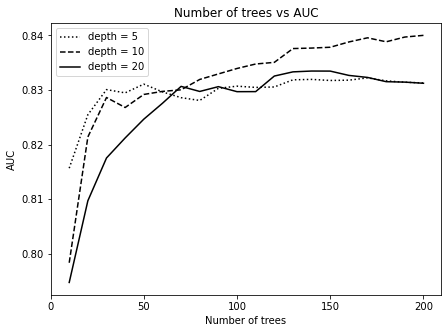

In [33]:
plt.figure(figsize= (7, 5))

plt.plot(n_trees, final_results[5], label = "depth = 5", color = "black", linestyle = "dotted")
plt.plot(n_trees, final_results[10], label = "depth = 10", color = "black", linestyle = "dashed")
plt.plot(n_trees, final_results[20], label = "depth = 20", color = "black", linestyle = "solid")
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title("Number of trees vs AUC")
plt.xlabel("Number of trees")
plt.ylabel("AUC")

plt.show()

+ As we can see, the best performance of our model is with `max_depth = 10`. 

<a name="ap3_1_3"></a>
### 3.1.3. min_samples_leaf

In [34]:
tree_leafsize = [3, 5, 10]
n_trees = np.arange(10, 201, 10)
scores = []
final_results = {}

for tl in tree_leafsize:
    scores = []
    
    for n in n_trees:
        rf = RandomForestClassifier(n_estimators = n, max_depth = 10, min_samples_leaf = tl, random_state = 3)
        rf.fit(X_train, Y_train)
        Y_pred_val = rf.predict_proba(X_val)[:, 1]
        ROC = roc_auc_score(Y_val, Y_pred_val).round(5)
        scores.append(ROC)
    
    final_results[tl] = scores

print("Results: {}".format(final_results))

Results: {3: [0.81303, 0.82962, 0.83119, 0.83362, 0.83625, 0.83877, 0.84021, 0.84097, 0.84028, 0.84147, 0.84213, 0.84315, 0.84235, 0.84246, 0.84191, 0.84174, 0.84191, 0.84186, 0.84168, 0.84239], 5: [0.82413, 0.83593, 0.83793, 0.84097, 0.8397, 0.83985, 0.84168, 0.84222, 0.84462, 0.84421, 0.84405, 0.84451, 0.84455, 0.84459, 0.84387, 0.84408, 0.84442, 0.84477, 0.84432, 0.84438], 10: [0.83434, 0.83911, 0.83988, 0.84099, 0.84046, 0.84146, 0.84223, 0.8432, 0.84303, 0.84288, 0.8427, 0.84249, 0.8416, 0.84072, 0.8408, 0.84107, 0.84146, 0.84165, 0.84146, 0.8416]}


In [35]:
best_dict = {key: max(val) for key, val in final_results.items()}
print("Best: {}".format(best_dict))

best_value = max(best_dict.values())
best_key = max(best_dict, key = best_dict.get)

print("\nFinal option -> {}: {}".format(best_key, best_value))

Best: {3: 0.84315, 5: 0.84477, 10: 0.8432}

Final option -> 5: 0.84477


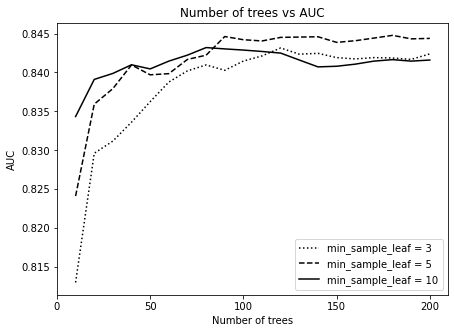

In [36]:
plt.figure(figsize= (7, 5))

plt.plot(n_trees, final_results[3], label = "min_sample_leaf = 3", color = "black", linestyle = "dotted")
plt.plot(n_trees, final_results[5], label = "min_sample_leaf = 5", color = "black", linestyle = "dashed")
plt.plot(n_trees, final_results[10], label = "min_sample_leaf = 10", color = "black", linestyle = "solid")
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title("Number of trees vs AUC")
plt.xlabel("Number of trees")
plt.ylabel("AUC")

plt.show()

+ The best choice is `min_samples_leaf = 5`.

<a name="ap3_2"></a>
## 3.2. Model selected

Therefore, we can train our best model possible:

In [37]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 10, min_samples_leaf = 5, random_state = 8)
rf.fit(X_train, Y_train)

Y_pred_val_rf = rf.predict_proba(X_val)[:, 1]
ROC_rf = roc_auc_score(Y_val, Y_pred_val)

print("ROC Random Forest: {}".format(ROC))

ROC Random Forest: 0.8416


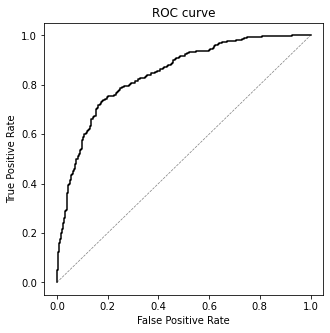

In [38]:
FPR, TPR, _ = roc_curve(Y_val, Y_pred_val_rf)

plt.figure(figsize = (5, 5))

plt.plot(FPR, TPR, color = "black")
plt.plot([0, 1], [0, 1], color = "black", linewidth  = 0.7, linestyle = "dashed", alpha = 0.5)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")

plt.show()

<a name="ap3_2_1"></a>
### 3.2.1 Feature importance

In [99]:
feat_importances = list(zip(dv.feature_names_, rf.feature_importances_))
feat_importances

[('age', 0.057186601085207525),
 ('amount', 0.08204850281400987),
 ('assets', 0.07241695031444383),
 ('debt', 0.014932732388824073),
 ('expenses', 0.03959069644271928),
 ('home=ignore', 1.568177254785021e-05),
 ('home=other', 0.010197773006167175),
 ('home=owner', 0.03456029041530173),
 ('home=parents', 0.009381643625283938),
 ('home=private', 0.005246030892528337),
 ('home=rent', 0.012736795139500719),
 ('home=unk', 0.0),
 ('income', 0.1786013721957556),
 ('job=fixed', 0.03663140849000084),
 ('job=freelance', 0.009713228152244473),
 ('job=others', 0.003068664364862698),
 ('job=partime', 0.040014042606543024),
 ('job=unk2', 0.0),
 ('marital=divorced', 0.00019014199304942403),
 ('marital=married', 0.007441588934233071),
 ('marital=separated', 0.0025199279222771196),
 ('marital=single', 0.0061936243516067),
 ('marital=unk', 0.0),
 ('marital=widow', 7.411344750025004e-05),
 ('price', 0.06718369702358128),
 ('records=no', 0.07577459090615254),
 ('records=yes', 0.06265803600333335),
 ('seni

In [100]:
df_importances = pd.DataFrame(feat_importances, columns = ["feature", "gain"]).sort_values(by = "gain", ascending  = False)
df_importances

,feature,gain
12,income,0.178601
27,seniority,0.142457
1,amount,0.082049
25,records=no,0.075775
2,assets,0.072417
24,price,0.067184
26,records=yes,0.062658
0,age,0.057187
16,job=partime,0.040014
4,expenses,0.039591


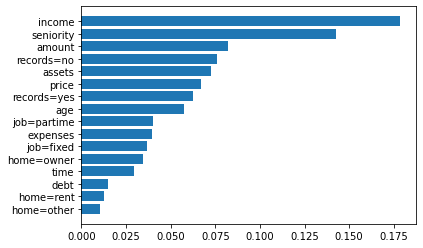

In [101]:
df_importances = df_importances[df_importances.gain > 0.01]

num = len(df_importances)

plt.plot(figsize = (6,4))
plt.barh(range(num), df_importances.gain[::-1])
plt.yticks(range(num), df_importances.feature[::-1])

plt.show()

<a name="ap4"></a>
# 4. XGBoost

In [39]:
dtrain = xgb.DMatrix(data = X_train, label = Y_train, feature_names = dv.feature_names_)
dval = xgb.DMatrix(data = X_val, label = Y_val, feature_names = dv.feature_names_)

In [40]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1, 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

In [41]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

Function for extranting information of xgb.train:

In [42]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split("\n"):
        it_line, train_line, val_line = line.split("\t")

        it = int(it_line.strip("[]"))
        train = float(train_line.split(":")[1])
        val = float(val_line.split(":")[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [43]:
%%capture output

model = xgb.train(xgb_params, dtrain,
                  num_boost_round = 100,
                  evals = watchlist, verbose_eval = 5)

In [44]:
tree, aucs_train, aucs_val_eta03 = parse_xgb_output(output)

print("Best choice: {}".format(max(zip(aucs_val_eta03, tree))))

Best choice: (0.82993, 20)


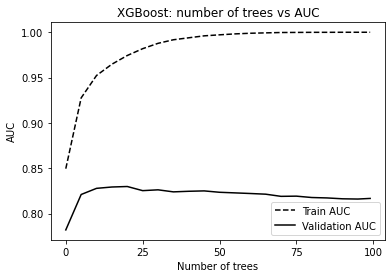

In [45]:
plt.figure(figsize = (6, 4))

plt.plot(tree, aucs_train, color = "black", linestyle = "dashed", label = "Train AUC")
plt.plot(tree, aucs_val_eta03, color = "black", linestyle = "solid", label = "Validation AUC")

plt.xticks(range(0, 101, 25))
plt.legend(loc = "best")

plt.title("XGBoost: number of trees vs AUC")
plt.xlabel("Number of trees")
plt.ylabel("AUC")

plt.show()

As we can see our model performance in validation step is much worse than in training. The model is overfitting so let's tune some hyperparameters.

<a name="ap4_1"></a>
## 4.1.Tuning hyperparameters

We are going to tune the following parameters:
   + eta.
   + max_depth.
   + min_child_witdh.
   + num_boost_round

<a name="ap4_1_1"></a>
### 4.1.1. eta

For smaller datasets is better a value like this one or 0.05. The default (0.3) value is suitable for large datasets.

`eta = 0.1`.

In [46]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round = 500, verbose_eval = 10,
                  evals = watchlist)

In [47]:
tree, _, aucs_val_eta01 = parse_xgb_output(output)

print("Best choice: {}".format(max(zip(aucs_val_eta01, tree))))

Best choice: (0.83769, 60)


`eta = 0.05`. 

In [48]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round = 500, verbose_eval = 10,
                  evals = watchlist)

In [49]:
tree, _, aucs_val_eta005 = parse_xgb_output(output)

print("Best choice: {}".format(max(zip(aucs_val_eta005, tree))))

Best choice: (0.84134, 130)


`eta = 0.01`. 

In [50]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round = 500, verbose_eval = 10,
                  evals = watchlist)

In [51]:
tree, _, aucs_val_eta001 = parse_xgb_output(output)

print("Best choice: {}".format(max(zip(aucs_val_eta001, tree))))

Best choice: (0.83629, 390)


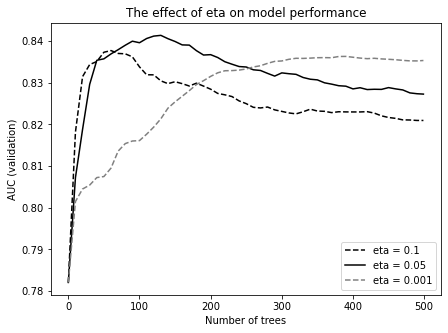

In [52]:
plt.figure(figsize = (7, 5))

plt.plot(tree, aucs_val_eta01, color = "black", linestyle = "dashed", label = "eta = 0.1")
plt.plot(tree, aucs_val_eta005, color = "black", linestyle = "solid", label = "eta = 0.05")
plt.plot(tree, aucs_val_eta001, color = "grey", linestyle = "dashed", label = "eta = 0.001")

plt.xticks(range(0, 501, 100))
plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

plt.show()

When eta is 0.05, the performance is similar to 0.1, but it takes 60 more iterations to reach the peak. For eta of 0.01, it grows too slowly, and even after 500 iterations, it hasn’t reached the peak. If we tried it for more iterations, it could potentially get to the same level of AUC as other values. Even if it was the case, it’s not practical: it becomes computationally expensive to evaluate all these trees during prediction time. Thus, we use the value of 0.1 for eta.

+ Best choice: `eta = 0.1`.

<a name="ap4_1_2"></a>
### 4.1.2. max_depth

The default value is 6 so we are going to try a higher value, for instance 6, and a lower value, for instance 3. Let's analize the results:

`max_depth = 3`.

In [53]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round = 500, verbose_eval = 10,
                  evals = watchlist)

In [54]:
tree, _, aucs_val_depth3 = parse_xgb_output(output)

print("Best choice: {}".format(max(zip(aucs_val_depth3, tree))))

Best choice: (0.8514, 100)


`max_depth = 6`.

In [55]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round = 500, verbose_eval = 10,
                  evals = watchlist)

In [56]:
tree, _, aucs_val_depth6 = parse_xgb_output(output)

print("Best choice: {}".format(max(zip(aucs_val_depth6, tree))))

Best choice: (0.83769, 60)


`max_depth = 10`.

In [57]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round = 500, verbose_eval = 10,
                  evals = watchlist)

In [58]:
tree, _, aucs_val_depth10 = parse_xgb_output(output)

print("Best choice: {}".format(max(zip(aucs_val_depth10, tree))))

Best choice: (0.82371, 80)


With max_depth = 3 it's better than max_depth = 6 and max_depth = 10. So let's try 4 to see if it's better than 3.

`max_depth = 4`.

In [59]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round = 500, verbose_eval = 10,
                  evals = watchlist)

In [60]:
tree, _, aucs_val_depth4 = parse_xgb_output(output)

print("Best choice: {}".format(max(zip(aucs_val_depth4, tree))))

Best choice: (0.84456, 60)


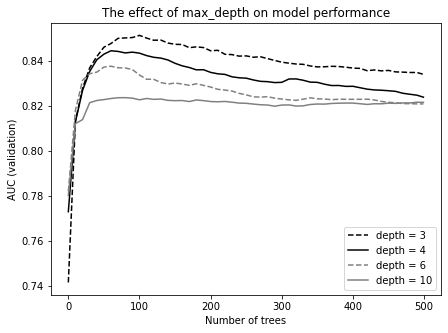

In [61]:
plt.figure(figsize = (7, 5))

plt.plot(tree, aucs_val_depth3, color = "black", linestyle = "dashed", label = "depth = 3")
plt.plot(tree, aucs_val_depth4, color = "black", linestyle = "solid", label = "depth = 4")
plt.plot(tree, aucs_val_depth6, color = "grey", linestyle = "dashed", label = "depth = 6")
plt.plot(tree, aucs_val_depth10, color = "grey", linestyle = "solid", label = "depth = 10")

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title("The effect of max_depth on model performance")
plt.xlabel("Number of trees")
plt.ylabel("AUC (validation)")

plt.show()

It is not better max_depth = 4 than max_depth = 3, so out best choice is:
    
+ max_depth = 3.

<a name="ap4_1_3"></a>
### 4.1.3. min_child_weight

`min_child_weight = 1`  (default value)

In [62]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round = 500, verbose_eval = 10,
                  evals = watchlist)

In [63]:
tree, _, aucs_val_mc1 = parse_xgb_output(output)

print("Best choice: {}".format(max(zip(aucs_val_mc1, tree))))

Best choice: (0.8514, 100)


`min_child_weight = 10`

In [64]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round = 500, verbose_eval = 10,
                  evals = watchlist)

In [65]:
tree, _, aucs_val_mc10 = parse_xgb_output(output)

print("Best choice: {}".format(max(zip(aucs_val_mc10, tree))))

Best choice: (0.85239, 230)


`min_child_weight = 30`

In [66]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round = 500, verbose_eval = 10,
                  evals = watchlist)

In [67]:
tree, _, aucs_val_mc30 = parse_xgb_output(output)

print("Best choice: {}".format(max(zip(aucs_val_mc30, tree))))

Best choice: (0.85135, 240)


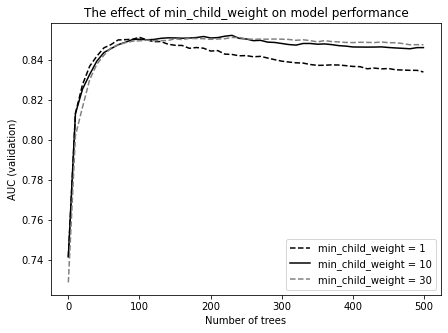

In [68]:
plt.figure(figsize = (7, 5))

plt.plot(tree, aucs_val_mc1, color = "black", linestyle = "dashed", label = "min_child_weight = 1")
plt.plot(tree, aucs_val_mc10, color = "black", linestyle = "solid", label = "min_child_weight = 10")
plt.plot(tree, aucs_val_mc30, color = "grey", linestyle = "dashed", label = "min_child_weight = 30")

plt.xticks(range(0, 501, 100))
plt.legend()

plt.title("The effect of min_child_weight on model performance")
plt.xlabel("Number of trees")
plt.ylabel("AUC (validation)")

plt.show()

The difference between them is not significant so let´s choose the default value:
+ min_child_weight = 1.

<a name="ap4_1_4"></a>
### 4.1.4. num_boost_round (number of trees)

In [69]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round = 500, verbose_eval = 10,
                  evals = watchlist)

In [70]:
tree, _, aucs_val = parse_xgb_output(output)

print("Best choice: {}".format(max(zip(aucs_val, tree))))

Best choice: (0.8514, 100)


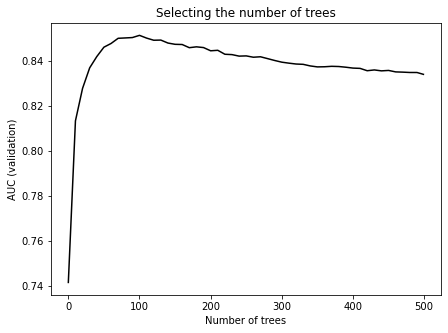

In [71]:
plt.figure(figsize = (7, 5))

plt.plot(tree, aucs_val, color = "black", linestyle = "solid")
plt.xticks(range(0, 501, 100))


plt.title("Selecting the number of trees")
plt.xlabel("Number of trees")
plt.ylabel("AUC (validation)")
           
plt.show()

The best choice is:
   + num_boost_round = 100.

<a name="ap4_2"></a>
## 4.2. Model selected

In [72]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round = 100, verbose_eval = 10,
                  evals = watchlist)

Y_pred_val_xgb = model.predict(dval)
ROC_xgb = roc_auc_score(Y_val, Y_pred_val)

In [73]:
print(output)
print("ROC XGB {}".format(ROC))

[0]	train-auc:0.78349	val-auc:0.74158
[10]	train-auc:0.84108	val-auc:0.81341
[20]	train-auc:0.86177	val-auc:0.82784
[30]	train-auc:0.87375	val-auc:0.83696
[40]	train-auc:0.88344	val-auc:0.84197
[50]	train-auc:0.89099	val-auc:0.84614
[60]	train-auc:0.89745	val-auc:0.84778
[70]	train-auc:0.90232	val-auc:0.85009
[80]	train-auc:0.90697	val-auc:0.85025
[90]	train-auc:0.91104	val-auc:0.85042
[99]	train-auc:0.91422	val-auc:0.85142

ROC XGB 0.8416


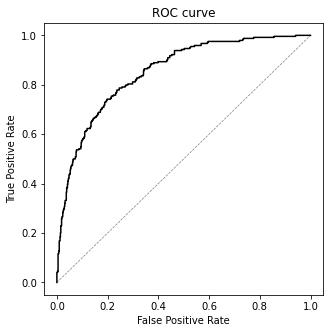

In [74]:
FPR, TPR, _ = roc_curve(Y_val, Y_pred_val_xgb)

plt.figure(figsize = (5, 5))

plt.plot(FPR, TPR, color = "black")
plt.plot([0, 1], [0, 1], color = "black", linewidth  = 0.7, linestyle = "dashed", alpha = 0.5)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")

plt.show()

<a name="ap4_2_1"></a>
### 4.2.1 Feature importance

In [109]:
scores = model.get_score(importance_type = "weight")
scores = sorted(scores.items(), key = lambda x: x[1])
list(reversed(scores))

[('income', 107.0),
 ('amount', 104.0),
 ('price', 80.0),
 ('seniority', 70.0),
 ('assets', 61.0),
 ('records=no', 44.0),
 ('age', 40.0),
 ('expenses', 34.0),
 ('time', 28.0),
 ('debt', 27.0),
 ('home=parents', 18.0),
 ('job=partime', 14.0),
 ('home=owner', 14.0),
 ('marital=separated', 12.0),
 ('home=private', 12.0),
 ('job=fixed', 10.0),
 ('job=others', 5.0),
 ('home=rent', 3.0),
 ('job=freelance', 2.0),
 ('home=other', 2.0),
 ('marital=married', 1.0)]

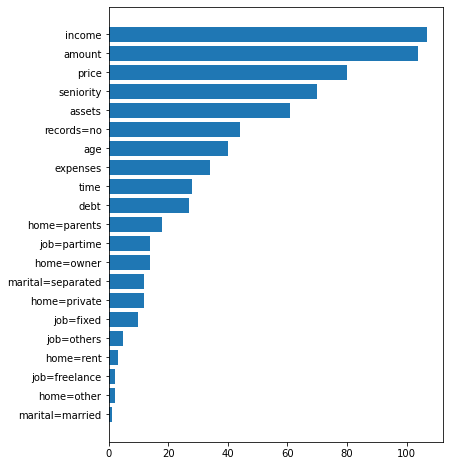

In [110]:
names = [n for (n, s) in scores]
scores = [s for (n, s) in scores]

plt.figure(figsize = (6, 8))

plt.barh(np.arange(len(scores)), scores)
plt.yticks(np.arange(len(names)), names)

plt.show()

<a name="ap5"></a>
# 5. Comparison between models

In [75]:
print("ROC scores / model:\n ")

print(" + Decision Trees: {}".format(ROC_dt))
print(" + Random Forest: {}".format(ROC_rf))
print(" + XGBoost: {}".format(ROC_xgb))

ROC scores / model:
 
 + Decision Trees: 0.7426742595079434
 + Random Forest: 0.841595510173056
 + XGBoost: 0.841595510173056


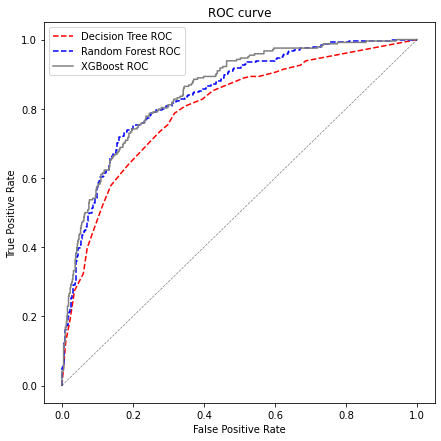

In [76]:
plt.figure(figsize = (7, 7))

FPR, TPR, _ = roc_curve(Y_val, Y_pred_val_dt)
plt.plot(FPR, TPR, color = "red", linestyle = "dashed", label = "Decision Tree ROC")

FPR, TPR, _ = roc_curve(Y_val, Y_pred_val_rf)
plt.plot(FPR, TPR, color = "blue", linestyle = "dashed", label = "Random Forest ROC")

FPR, TPR, _ = roc_curve(Y_val, Y_pred_val_xgb)
plt.plot(FPR, TPR, color = "grey", linestyle = "solid", label = "XGBoost ROC")

plt.plot([0, 1], [0, 1], color = "black", linewidth = 0.7, linestyle = "dashed", alpha = 0.5)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")

plt.legend(loc = "best")

plt.show()

After applying to our models both training and validation datasets, and tunning their hyperparamters, we can conclude that XGBoost model have a similar performance (checking out the ROC scores). It is slightly better than the Random Forest performance.

Now, let's apply the test set to XGBoost model to conclude it is our best choice for our proyect:

<a name="ap6"></a>
# 6. Final test

In [84]:
dtest = xgb.DMatrix(data = X_test, label = Y_test, feature_names = dv.feature_names_)

Y_pred_test_xgb = model.predict(dtest)
ROC_xgb_final = roc_auc_score(Y_val, Y_pred_val)

print("XGBoost Final ROC: {}".format(ROC_xgb_final))

XGBoost Final ROC: 0.841595510173056


We can conclude the model that fits better in our proyect is the `XGBoost`.